Statquest with Josh Starmer
- XGBoost

Exceptionally useful ML method when you don't want to sacrifice ability to correctly classify observations but still want a model that is fairly easy to understand and interpret

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd # load and manipulate dat and for one-hot encoding
import numpy as np # calc mean and std dev
import xgboost as xgb # xgb
from sklearn.model_selection import train_test_split #split data into train and test set
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer #for scoring during
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix #creates confusion matrix
from sklearn.metrics import plot_confusion_matrix #draws confusion matrix

Load dataset from IBM Base Samples (Telco Churn Dataset).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco_customer_churn.csv to Telco_customer_churn.csv


In [ ]:
df = pd.read_csv('Telco_customer_churn.csv')

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Last few columns regarding churn are from people that left Telco, don't want to use this data in our prediction.
- no one's going to do the exit interview before leaving the company
- these columns will give us perfect predictive ability, so drop them

In [ ]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1, inplace = True) #axis = 0 to remove rows, 1 to remove columns
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Some columns only contain a single value, and will not be useful for classification

In [ ]:
df['Count'].unique()

array([1])

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

City contains abunch of city names, so will leave it in

In [ ]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

Will also remove `CustomerID` b/c diff value for every single person. 
- Also remove Lat Long b/c already ahve latitude and longitude

In [ ]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], axis = 1, inplace = True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Although Ok to have whitespace in city names for XGBoost and classification, we can't have whitespace if we want to draw a tree. So take care of it by replacing whitespace with underscore.
- can easily remove whitespaces from all values, not just city names, but will wait until we have identified missing values

In [ ]:
df['City'].replace(' ', '_', regex = True, inplace = True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

Eliminate whitespace in the column names, so replace it with underscores

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Removed all model that won't help us create an effective XGB model and reformatted the column name and city names so we can draw a tree. Now ready to identify and deal with Missing Data

# Missing Data Part 1: Identifying Missing data
unfortunately, biggest part of any data analysis project is making sure that the data are correctly formatted and fixing it when it's not. First part of process is identifying Missing data.

Missing data is simply blank space, or a surrogate value like NA, that indicates we failed to collect data for one of the features. 

One thing that is relatively unique about XGBoost is that it has default behavior for missing data. SO all we have to do is identify missing values and make sure they are set to 0.
- author of XGBoost has said even when you code something with 0 and use 0 to mean missing data, XGBoost still does a great job. It doesn't interfere with how it performs

First see what type of data is in each column

In [ ]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

A lot of object columns, is ok, b/c saw a lot of text responses. Verify we are getting what we expect

In [ ]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

So `Phone_Service` only contains `Yes` and `No`. In practice, check every other column. Here we focus on 1 column that could be a problem: `Total_Charges`

In [ ]:
df['City'].unique()

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', ..., 'Standish',
       'Tulelake', 'Olympic_Valley'], dtype=object)

In [ ]:
df['Zip_Code'].unique()

array([90003, 90005, 90006, ..., 96128, 96134, 96146])

In [ ]:
df['Latitude'].unique()

array([33.964131, 34.059281, 34.048013, ..., 40.346634, 41.813521,
       39.191797])

In [ ]:
df['Longitude'].unique()

array([-118.272783, -118.30742 , -118.293953, ..., -120.386422,
       -121.492666, -120.212401])

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Senior_Citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Tenure_Months'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72,  0])

In [ ]:
df['Multiple_Lines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
df['Internet_Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df['Online_Security'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['Online_Backup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [ ]:
df['Device_Protection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['Tech_Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['Streaming_TV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['Streaming_Movies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [ ]:
df['Paperless_Billing'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Payment_Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df['Monthly_Charges'].unique()

array([ 53.85,  70.7 ,  99.65, ..., 108.35,  63.1 ,  78.7 ])

In [ ]:
df['Churn_Value'].unique()

array([1, 0])

 Here we focus on 1 column that could be a problem: Total_Charges

In [ ]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

Too many values to print "...". Try to convert to numeric, we get error.
- unable to parse string " " at position 2234
- tells us there are blank spaces in this column

# Missing Data Part 2: Dealing with Missing Data, XGBoost Style
One thing that is relatively unique about XGBoost is that it determines default behavior for missing data. So all we have to do is identify missing values and make sure they are set to 0.

However before we do that, let's see how many rows are missing data. If it's a lot, then we might have a problem on our hands that is bigger than XGBoost can deal with on its own. If it's not many then we can just set them to 0

In [ ]:
len(df.loc[df['Total_Charges'] == ' '])

11

Only 11 rows having missing data, let's look at them

In [ ]:
df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


See all 11 with " " have just signed up, b/c Tenure_Months is 0. THese people also all have Churn_Value = 0 b/c they just signed up. 
- have few choices, can set Total_Charges = 0 for these 11 people or can remove them.
- in this example, we set to 0

In [ ]:
# rows = ' ' and column = Total_charges set values = 0
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [ ]:
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


Verified df contains 0s instead of ' ' for missing values. **NOTE: Total_Charges** still has the `object` data type. No good because XGBoost only allows `int`, `float`, or `boolean` data types. Can fix this by converting it with `to_numeric()`

In [ ]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

Now that we've dealt with missing data, can replace all other whitespaces in all of the columns with underscores. **NOTE**: only doing this so we can draw picture of one of the XGBoost Trees

In [ ]:
# doing it data frame wide
df.replace(' ', '_', regex = True, inplace = True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


# Format Data Part 1: Split Data into dependent and independent variables
two parts:
1. columns of data that we will use to make classifications
2. column of data we want to predict (Churn value)

use conventional notation of X to represent columns of data that we will use to make classifications and y to represent thing we want to predict. 

reason we deal with missing data before splitting into X and y is that if we remove rows splitting after ensures that each row in X correctly corresponds with the appropriate value in y.

**NOTE:** using `copy()` to copy the data by value. By default, pandas uses copy by reference. Using `copy()` ensures that the original data `df_no_missing` is not modified when we modify X or y. In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy `df_no_missing`, rather than having to reload the original data and remove the missing values etc.

In [ ]:
X = df.drop('Churn_Value', axis = 1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [ ]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

Now to format X so it's suitable for XGBoost

#Format the Data Part 2: One-Hot Encoding
Now split into X and y, take closer look at variables in X.

In [ ]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

All object type columns need to be inspected to make sure they only contain reasonable values, and most, if not all of them, will need to change. B/c, while XGBoost natively supports continuous data, like Monthly_Charges and Total_Charges, it doesn't natively support categorical data like Phone_Service, which contains 2 different categories. Thus in order to use categorical data with XGBoost, have to use trick that converts column of categorical data into multiple columns of binary values. **One-Hot Encoding**

Treating like continuous data: 1, 2, 3, 4
- would assume 4 is more similar to 3 than it is to 1 or 2. XGBoost Tree more likely to cluster people with 4s and 3s than with 1s.

Treat like categorical data: each one as separate category

Many different ways to do One-Hot Encoding. Two more popular ways: `ColumnTransformer()` (from scikit-learn) and `get_dummies()` (from pandas) and both have pros and cons.
- `ColumnTransformer()` has a very cool feature where it creates persistent function that can validate data that you can get in the future. 
- Downside is that it turns yoru data into an array and loses all of the column names, making it harder to verify that your usage of `ColumnTransformer()`
- In contrast `get_dummies()` leaves your data in a dataframe and retains column names, making it much easier to verify that it worked as intended.
- however doesnt have the persistent behavior that `ColumnTransformer()` has. 
- We use `get_dummies()` for the sake of learning, but once comfortable with OHE, encourage you to use `ColumnTransformer()`

In [ ]:
pd.get_dummies(X, columns = ['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


**NOTE**: in a real situation, should verify all of these columns contain accepted categories. 

In [ ]:
X_encoded = pd.get_dummies(X, columns = ['City', 
                                         'Gender', 
                                         'Senior_Citizen', 
                                         'Partner', 
                                         'Dependents', 
                                         'Phone_Service',
                                         'Multiple_Lines',
                                         'Internet_Service',
                                         'Online_Security',
                                         'Online_Backup',
                                         'Device_Protection',
                                         'Tech_Support',
                                         'Streaming_TV',
                                         'Streaming_Movies',
                                         'Contract',
                                         'Paperless_Billing',
                                         'Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


Verify y only contains 1s and 0s with unique()

In [ ]:
y.unique()

array([1, 0])

Done formatting

XGBoost uses sparse matrices, only keeps track of the 1s, doesn't allocate memory for the 0s (memory efficient)

#Build a Preliminary XGBoost Model

split into train and test. observe data is imbalanced by dividing the number of people who left the company, where y =1 by total number of people in the dataset

In [ ]:
sum(y) / len(y)

0.2653698707936959

Only 26.5% of people in dataset left company. B/C of this when we split the data into training and testing, will split using stratification in order to maintain same % of people who left the company in both the training & testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)

In [ ]:
# see if stratify worked as expected
sum(y_train)/len(y_train)

0.2654297614539947

In [ ]:
sum(y_test)/len(y_test)

0.26519023282226006

same % of people in both y_train and y_test

**Note:** instead of determining the optimal number of trees with CV, we will use **early stopping** to stop building trees when they no longer improve the situation

Specify binary:logistic -> for classification (logistic regression approach to evaluate how good the XGBoost is at classifying the observations)
- missing = none, default is none. -> telling XGBoost what character we're using to represent missing values.
-  seed = 42, in order to hopefully replicate same result
- XGBClassifier creates the shell in which we're going to create a forest of extreme gradient boosted trees, stored in clf_xgb
- create those trees by using fit
- early_stopping_rounds = 10, build 10 more trees, if none improve predictions, then it'll stop
- using aucpr to evaluate how well predictions are being made

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', missing = None, seed = 42)
clf_xgb.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'aucpr', eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.578392
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.580597
[2]	validation_0-aucpr:0.590099
[3]	validation_0-aucpr:0.601636
[4]	validation_0-aucpr:0.608932
[5]	validation_0-aucpr:0.603821
[6]	validation_0-aucpr:0.618314
[7]	validation_0-aucpr:0.610906
[8]	validation_0-aucpr:0.620122
[9]	validation_0-aucpr:0.62495
[10]	validation_0-aucpr:0.629252
[11]	validation_0-aucpr:0.628517
[12]	validation_0-aucpr:0.650051
[13]	validation_0-aucpr:0.649035
[14]	validation_0-aucpr:0.650546
[15]	validation_0-aucpr:0.652876
[16]	validation_0-aucpr:0.654922
[17]	validation_0-aucpr:0.655347
[18]	validation_0-aucpr:0.655818
[19]	validation_0-aucpr:0.655958
[20]	validation_0-aucpr:0.656236
[21]	validation_0-aucpr:0.655564
[22]	validation_0-aucpr:0.656688
[23]	validation_0-aucpr:0.657409
[24]	validation_0-aucpr:0.656236
[25]	validation_0-aucpr:0.655347
[26]	validation_0-aucpr:0.656541
[27]	validation_0-aucpr:0.657225
[28]	validation_0-auc

XGBClassifier(seed=42)

Only created 45 trees. Now let's see how it performs on testing dataset by running the testing dataset down the model and drawing a confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


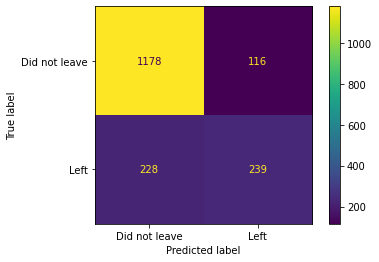

In [ ]:
plot_confusion_matrix(clf_xgb, X_test, y_test, 
                      values_format = 'd', display_labels = ["Did not leave", "Left"])

- 1294 didn't leave, 1178 (91%) correctly classified.
- 467 left, 239 (51%) were correctly classified.
- XGBoost model was not awesome. 
- part of the problem is that our data is imbalanced, which we saw earlier and we see this in the confusion matrix with the top row showing 1262 people didn't default 
- bottom row showing 467 people who did.
- because people leaving costs the money a lot of money, we would like to capture more ofthe people that left. 
- the good news is that XGBoost has a parameter, `scale_pos_weight`, that helps with imbalanced data. 
- let's try to improve predictions using **Cross Validation** to optimize the parameters

# Optimize Parameters using Cross Validation and GridSearch()
XGBoost has a lot of *hyperparameters*, parameters that we have to manually configure and are not determned by XGBoost itself, including `max_depth`, the maximum tree depth, `learning_rate`, the learning rate, or "eta", `gamma`, the parameter that encourages pruning, and `reg_lambda`, the regularization parameter lambda. So let's try to find the optimal values for these hyperparameters in hopes that we can improve the accuracy with the Testing dataset.

**NOTE:** since we have many hyperparameters to optimize, use `GridSearchCV()`. Specify a bunch of potential values for the hyperparameters and `GridSearchCV()` tests all possible combos of the parameters for us.

when data are imbalanced, XGBoost manual says if you care only about overall performance metric (AUC) of your prediction
-  Balance the positive and negative weights via `scale_pos_weight`
- Use AUC for evaluation
**NOTE:** ran GridSearchCV sequentially on subsets of parameter options, rather than all at once in order to optimize parameters in a short period of time.

In [ ]:
# ## Round 1
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5] # XG Boost recommends sum(negative instances) / sum(positive instances)
}
# # output: max_depth: 4, learning: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
# # b/c learning_rate and reg_lambda at the ends of their range, we will continue to explore
# ## Round 2
# # got middle for max_depth so chose it.
# # learning rate got edge, so went in that direction
# # gamma got mid value
# # reg_lambda got right side edge, so explore
# # weight got mid
# param_grid = {
#     'max_depth': [4],
#     'learning_rate': [0.1, 0.5, 1],
#     'gamma': [0.25],
#     'reg_lambda': [10.0, 20, 100],
#     'scale_pos_weight': [3]
# }
# # output: max_depth: 4, learning_rate: 0.1, reg_lambda: 10

# NOTE: to speed up CV, and to further prevent overfitting, only using random subset
# of data (90%) and are only using a random subset of the features (columns) (50%) per tree.
optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic',
                                  seed = 42,
                                  subsample = 0.9,
                                  colsample_bytree = 0.5),
                              param_grid = param_grid,
                              scoring = 'roc_auc',
                              verbose = 0,
                              n_jobs = 10,
                              cv = 3)
optimal_params.fit(X_train, y_train)
# # only doing 3 fold cv, not a lot



GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5, seed=42,
                                     subsample=0.9),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc')

In [ ]:
optimal_params

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5, seed=42,
                                     subsample=0.9),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc')

after testing all possible combinations of the potential parameter values with CV, see that we should set `gamma` = 0.25, `learn_rate` = 0.1, `max_depth` = 4, `reg_lambda` = 10

# Building, Evaluating, Drawing, and interpreting the Optimized XGBoost Model

In [ ]:
clf_xgb = xgb.XGBClassifier(seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5)

clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.53278
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.614654
[2]	validation_0-aucpr:0.62623
[3]	validation_0-aucpr:0.632985
[4]	validation_0-aucpr:0.630432
[5]	validation_0-aucpr:0.630932
[6]	validation_0-aucpr:0.63177
[7]	validation_0-aucpr:0.634766
[8]	validation_0-aucpr:0.634402
[9]	validation_0-aucpr:0.635058
[10]	validation_0-aucpr:0.635457
[11]	validation_0-aucpr:0.635323
[12]	validation_0-aucpr:0.635502
[13]	validation_0-aucpr:0.640483
[14]	validation_0-aucpr:0.639526
[15]	validation_0-aucpr:0.639647
[16]	validation_0-aucpr:0.653324
[17]	validation_0-aucpr:0.655414
[18]	validation_0-aucpr:0.654974
[19]	validation_0-aucpr:0.651737
[20]	validation_0-aucpr:0.651866
[21]	validation_0-aucpr:0.656086
[22]	validation_0-aucpr:0.65352
[23]	validation_0-aucpr:0.653576
[24]	validation_0-aucpr:0.651395
[25]	validation_0-aucpr:0.650606
[26]	validation_0-aucpr:0.649366
[27]	validation_0-aucpr:0.645388
[28]	validation_0-aucpr:

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learn_rate=0.1, max_depth=4,
              reg_lambda=10, scale_pos_weight=3, seed=42, subsample=0.9)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


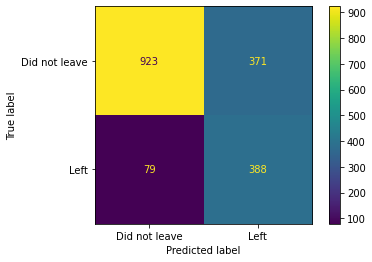

In [ ]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      y_test,
                      values_format = 'd',
                      display_labels = ['Did not leave', 'Left'])

See optimized XGBoost model is al ot better at identifying people that left the company. Of 467, 388 (83%) were correctly identified. Before optimization only 239 (51%). However, this improvement was at expense of not beign able to correctly classify as many people that didn't leave. Before optimization, correctly identified 1178 (91%) people that didn't leave. Now we only correctly classify 923 (71.3%). That said this trade off may beb etter for the company because now it can focus resources on the people that leave if that will help them retain them.

Now draw the tree and discuss how to interpret.

In [ ]:
# if want to get info, like gain and cover etc, at each node in first tree,
# just build first tree, otherwise we'll get average over all the trees
clf_xgb = xgb.XGBClassifier(seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5,
                            n_estimators = 1) ## set to 1 so can get gain, cover etc)
clf_xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learn_rate=0.1, max_depth=4,
              n_estimators=1, reg_lambda=10, scale_pos_weight=3, seed=42,
              subsample=0.9)

weight:  {'Contract_Month-to-month': 1, 'Streaming_Movies_Yes': 1, 'Payment_Method_Electronic_check': 2, 'Zip_Code': 2, 'Tech_Support_Yes': 3, 'Paperless_Billing_No': 1, 'Longitude': 3, 'Online_Security_No_internet_service': 1, 'Gender_Female': 1}
gain:  {'Contract_Month-to-month': 1631.77637, 'Streaming_Movies_Yes': 67.3808594, 'Payment_Method_Electronic_check': 50.922088650000006, 'Zip_Code': 5.201111790000001, 'Tech_Support_Yes': 23.726112366666666, 'Paperless_Billing_No': 9.83537102, 'Longitude': 6.548796336666666, 'Online_Security_No_internet_service': 213.820374, 'Gender_Female': 1.0939008}
cover:  {'Contract_Month-to-month': 1820.25, 'Streaming_Movies_Yes': 609.5, 'Payment_Method_Electronic_check': 701.25, 'Zip_Code': 153.5, 'Tech_Support_Yes': 466.0, 'Paperless_Billing_No': 111.5, 'Longitude': 138.5, 'Online_Security_No_internet_service': 1210.75, 'Gender_Female': 6.0}
total_gain:  {'Contract_Month-to-month': 1631.77637, 'Streaming_Movies_Yes': 67.3808594, 'Payment_Method_Elect

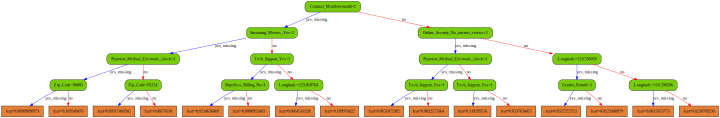

In [ ]:
## now print out weight, gain, cover, etc. for tree
# weight = number of times a feature is used in a branch or root across all trees
# gain = avg gain across all splits that the feature is used in
# cover = avg coverage across all splits a feature is used in
# total_gain = total gain across all splits the feature is used in
# total_cover = total coverage across all splits the feature is used in
# NOTE: since only built 1 tree, gain = total gain and cover = total_cover
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
  print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))

node_params = {'shape': 'box', ## makes nodes fancy
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box', 
               'style': 'filled',
               'fillcolor': '#e48038'}

# NOTE: num_trees is NOT the number of trees to plot, but specific tree you want to plot
# default value = 0, but getting it just to show it in action since it's counterintuitive
# xgb.to_graph(clf_xgb, num_trees = 0, size = "10,10")
xgb.to_graphviz(clf_xgb, num_trees = 0, size = "10,10",
                condition_node_params = node_params,
                leaf_node_params = leaf_params)

# if you want to save the figure
# graph_data = xgb.to_graphviz(clf_xgb, num_trees = 0, size = "10,10",
#                              condition_node_params = node_params,
#                              leaf_node_params = leaf_params)
# graph_data.view(filename = 'xgboost_tree_customer_churn') ## save as pdf

How to interpret the XGBoost Tree. In each node we have:
- variable (column name) and threshold for splitting the observations. E.g. in tree's root, use Contract_Month-to-month to split observations
  - Contract_Month-to-month < 1 go to left, everything else go to right
- each branch either says yes or no and some also say missing
  - yes and no refer to whether the threshold in the node above it is true or not. If not, then no.
  - missing is the default outpion if there is missing data
- leaf tells us the output value for each leaf.

# Conclusion
- loaded data from file
- identified and dealth with missing data
- formatted data for XGBoost using One Hot Encoding
- built XGBoost Model for Classification
- Optimize the XGBoost parameters with CV and GridSearch()
- Built, Drew, interpreted and Evaluated the Optimized XGBoost Model